In [ ]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=fd2861ff277694ad97fc9e300a468b111d115143be633605ab2cab3fb69615ab
  Stored in directory: /root/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for term

**Importing required libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/CT_KIDNEY")

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpeg"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

1600

In [ ]:
#creating dictionary of flower species
flower_images_dict={
    "Cyst":list(directory.glob('Cyst/*.jpg')),
    "Normal":list(directory.glob('Normal/*.jpg')),
    "Stone":list(directory.glob('Stone/*.jpg')),
    "Tumor":list(directory.glob('Tumor/*.jpg'))
}

In [ ]:
flower_images_dict

{'Cyst': [PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (10).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (100).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (103).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (102).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (101).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (1).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (108).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (106).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (107).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (105).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (104).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (112).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (111).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (11).jpg'),
  PosixPath('/co

In [ ]:
#Different species list
keys=["Cyst","Normal","Stone","Tumor"]

In [ ]:
#resizing and creating labels using computer vision
count = 0
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        count=count+1
        print(count)
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
1
completed
2
completed
3
completed
4
completed
5
completed
6
completed
7
completed
8
completed
9
completed
10
completed
11
completed
12
completed
13
completed
14
completed
15
completed
16
completed
17
completed
18
completed
19
completed
20
completed
21
completed
22
completed
23
completed
24
completed
25
completed
26
completed
27
completed
28
completed
29
completed
30
completed
31
completed
32
completed
33
completed
34
completed
35
completed
36
completed
37
completed
38
completed
39
completed
40
completed
41
completed
42
completed
43
completed
44
completed
45
completed
46
completed
47
completed
48
completed
49
completed
50
completed
51
completed
52
completed
53
completed
54
completed
55
completed
56
completed
57
completed
58
completed
59
completed
60
completed
61
completed
62
completed
63
completed
64
completed
65
completed
66
completed
67
completed
68
completed
69
completed
70
completed
71
completed
72
completed
73
completed
74
completed
75
completed
76
completed
77
complete

{'Cyst': [PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (10).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (100).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (103).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (102).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (101).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (1).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (108).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (106).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (107).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (105).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (104).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (112).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (111).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (11).jpg'),
  PosixPath('/co

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

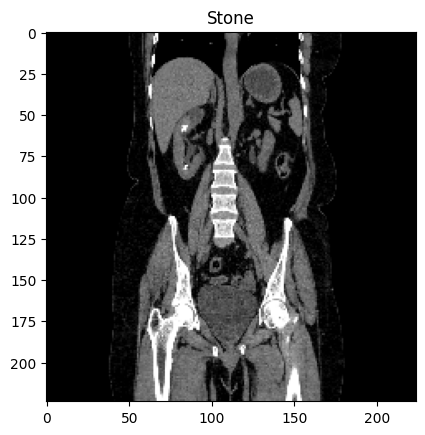

In [ ]:
print_image(x_train[37],y_train[37])

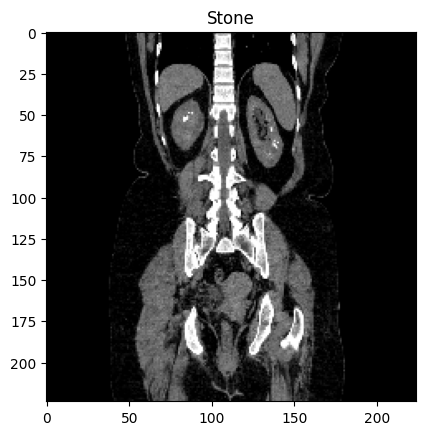

In [ ]:
print_image(x_train[10],y_train[10])

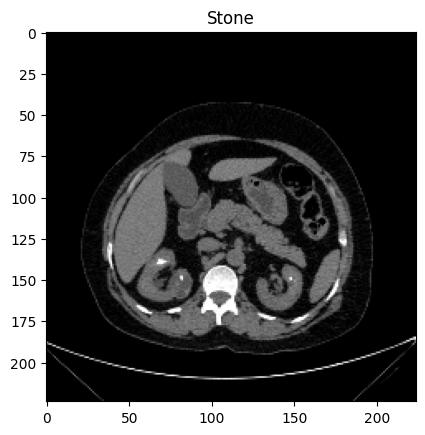

In [ ]:
print_image(x_train[15],y_train[15])

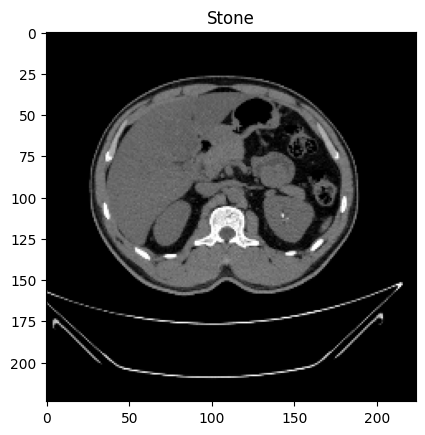

In [ ]:
print_image(x_test[6],y_test[6])

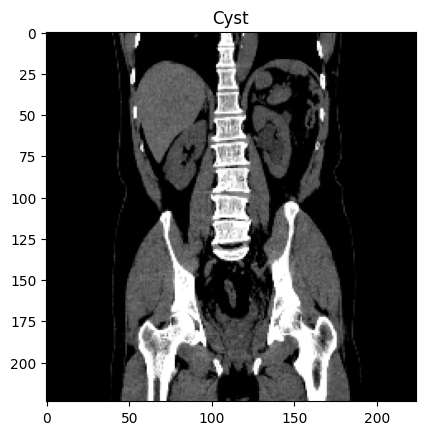

In [ ]:
print_image(x_test[19],y_test[19])

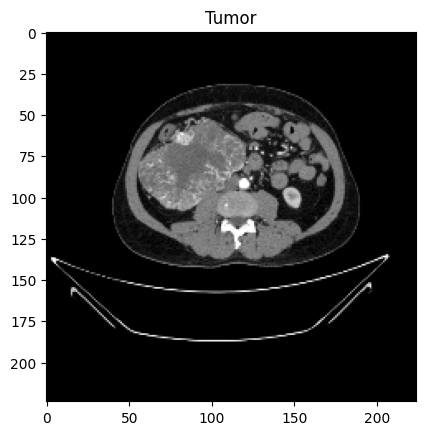

In [ ]:
print_image(x_test[28],y_test[28])

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(1200, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(1200,)

In [ ]:
x_test_scaled.shape

(400, 224, 224, 3)

In [ ]:
y_test=np.array(y_test)
y_test.shape

(400,)

**Callbacks for stopping when the required accuracy is achieved**

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

# **1. Simple CNN Model**

# **1.1 Activation function = "Relu" ,Optimizer = "adam"**

In [ ]:
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare = model.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

13/13 [==============================] - 7s 528ms/step - loss: 0.0031 - accuracy: 1.0000


[0.00305135827511549, 1.0]

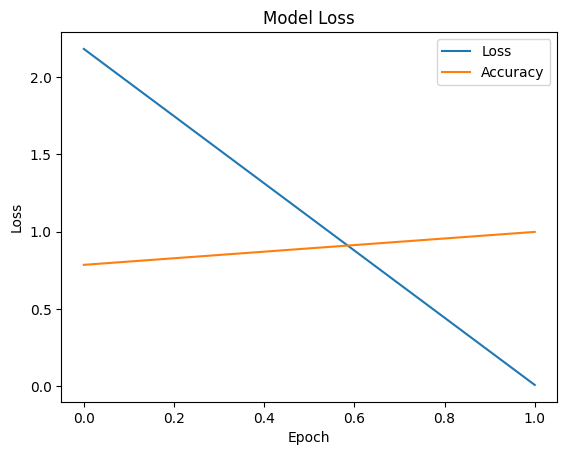

In [ ]:
# Plot training & validation loss values
plt.plot(compare.history['loss'])
plt.plot(compare.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.2 Activation function = "Relu" ,Optimizer = "adamax"**

In [ ]:
model1=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model1.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare_ = model1.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 56s 1s/step - loss: 1.3027 - accuracy: 0.8025
Epoch 2/10
38/38 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9950call

Reached 99.00% accuracy, so stopping training!!
38/38 [==============================] - 51s 1s/step - loss: 0.0237 - accuracy: 0.9950


In [ ]:
model1.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 5s 368ms/step - loss: 0.0071 - accuracy: 1.0000


[0.007087507750838995, 1.0]

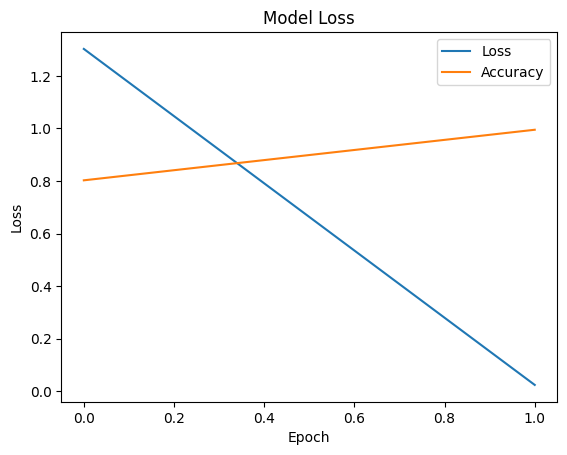

In [ ]:
# Plot training & validation loss values
plt.plot(compare_.history['loss'])
plt.plot(compare_.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.3 Activation function = "Relu" ,Optimizer = "RMSProp"**

In [ ]:
model2=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model2.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare_1 = model2.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 55s 1s/step - loss: 1.4601 - accuracy: 0.8725
Epoch 2/10
38/38 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9992call

Reached 99.00% accuracy, so stopping training!!
38/38 [==============================] - 50s 1s/step - loss: 0.0085 - accuracy: 0.9992


In [ ]:
model2.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 5s 291ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016412233235314488, 1.0]

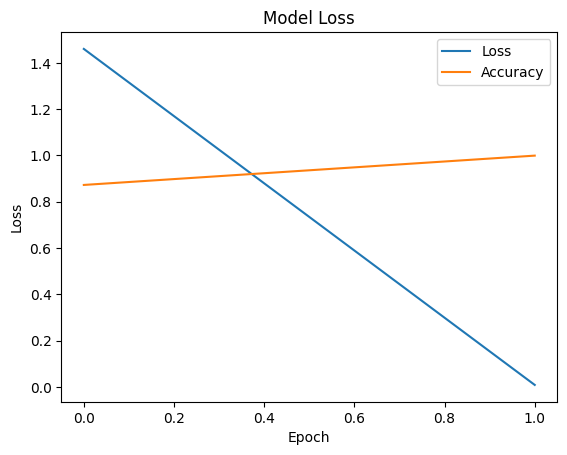

In [ ]:
# Plot training & validation loss values
plt.plot(compare_1.history['loss'])
plt.plot(compare_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [ ]:
model3=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare_2 = model3.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 52s 1s/step - loss: 4.4346 - accuracy: 0.8300
Epoch 2/10
38/38 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9992call

Reached 99.00% accuracy, so stopping training!!
38/38 [==============================] - 55s 1s/step - loss: 0.0094 - accuracy: 0.9992


In [ ]:
model3.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 297ms/step - loss: 0.0086 - accuracy: 1.0000


[0.008587733842432499, 1.0]

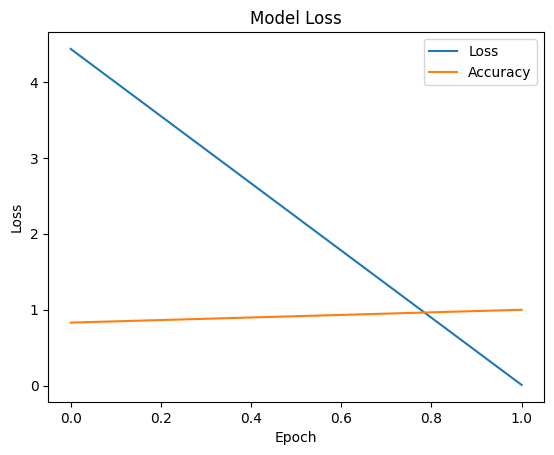

In [ ]:
# Plot training & validation loss values
plt.plot(compare_2.history['loss'])
plt.plot(compare_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [ ]:
model4=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model4.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare_3 = model4.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 62s 2s/step - loss: 1.3075 - accuracy: 0.4700
Epoch 2/10
38/38 [==============================] - 59s 2s/step - loss: 1.1540 - accuracy: 0.6842
Epoch 3/10
38/38 [==============================] - 65s 2s/step - loss: 1.0174 - accuracy: 0.7708
Epoch 4/10
38/38 [==============================] - 58s 2s/step - loss: 0.8960 - accuracy: 0.9008
Epoch 5/10
38/38 [==============================] - 58s 2s/step - loss: 0.7895 - accuracy: 0.9150
Epoch 6/10
38/38 [==============================] - 59s 2s/step - loss: 0.6986 - accuracy: 0.9425
Epoch 7/10
38/38 [==============================] - 60s 2s/step - loss: 0.6197 - accuracy: 0.9500
Epoch 8/10
38/38 [==============================] - 60s 2s/step - loss: 0.5524 - accuracy: 0.9675
Epoch 9/10
38/38 [==============================] - 58s 2s/step - loss: 0.4947 - accuracy: 0.9767
Epoch 10/10
38/38 [==============================] - 59s 2s/step - loss: 0.4439 - accuracy: 0.9858


In [ ]:
model4.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 292ms/step - loss: 0.4311 - accuracy: 0.9875


[0.4310535192489624, 0.987500011920929]

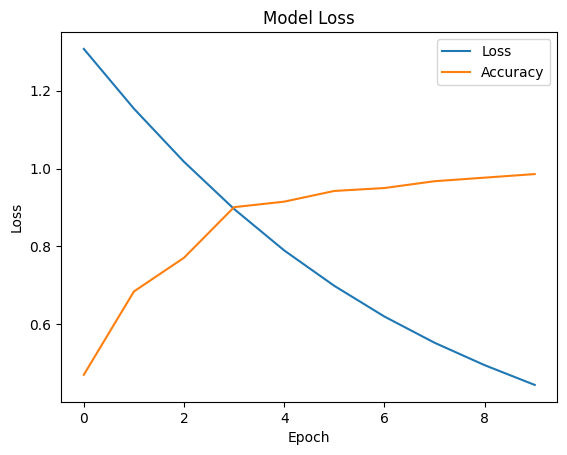

In [ ]:
# Plot training & validation loss values
plt.plot(compare_3.history['loss'])
plt.plot(compare_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2. CNN Model With Data Augmentation layers and Dropout layers**

# **2.1 Activation function = "Relu" ,Optimizer = "adam"**

In [ ]:
model2_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare2_1 = model2_1.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 60s 2s/step - loss: 1.6475 - accuracy: 0.4858
Epoch 2/10
38/38 [==============================] - 56s 1s/step - loss: 0.6299 - accuracy: 0.7600
Epoch 3/10
38/38 [==============================] - 60s 1s/step - loss: 0.3783 - accuracy: 0.8692
Epoch 4/10
38/38 [==============================] - 59s 2s/step - loss: 0.2279 - accuracy: 0.9200
Epoch 5/10
38/38 [==============================] - 57s 2s/step - loss: 0.1720 - accuracy: 0.9433
Epoch 6/10
38/38 [==============================] - 55s 1s/step - loss: 0.1576 - accuracy: 0.9467
Epoch 7/10
38/38 [==============================] - 58s 2s/step - loss: 0.0964 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 58s 2s/step - loss: 0.0749 - accuracy: 0.9775
Epoch 9/10
38/38 [==============================] - 55s 1s/step - loss: 0.0685 - accuracy: 0.9808
Epoch 10/10
38/38 [==============================] - 57s 1s/step - loss: 0.0595 - accuracy: 0.9842


In [ ]:
model2_1.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 5s 394ms/step - loss: 0.0447 - accuracy: 0.9875


[0.04474983736872673, 0.987500011920929]

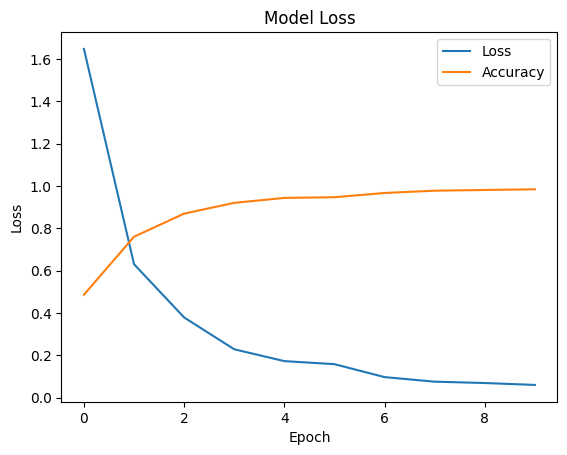

In [ ]:
# Plot training & validation loss values
plt.plot(compare2_1.history['loss'])
plt.plot(compare2_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.2 Activation function = "Relu" ,Optimizer = "adamax"**

In [ ]:
model2_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare2_2 = model2_2.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

In [ ]:
model2_2.evaluate(x_test_scaled,np.array(y_test))

In [ ]:
# Plot training & validation loss values
plt.plot(compare2_2.history['loss'])
plt.plot(compare2_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [ ]:
model2_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare2_3 = model2_3.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 56s 1s/step - loss: 3.8605 - accuracy: 0.4467
Epoch 2/10
38/38 [==============================] - 56s 1s/step - loss: 0.8993 - accuracy: 0.6325
Epoch 3/10
38/38 [==============================] - 55s 1s/step - loss: 0.6140 - accuracy: 0.7533
Epoch 4/10
38/38 [==============================] - 54s 1s/step - loss: 0.4159 - accuracy: 0.8358
Epoch 5/10
38/38 [==============================] - 56s 1s/step - loss: 0.3312 - accuracy: 0.8775
Epoch 6/10
38/38 [==============================] - 56s 1s/step - loss: 0.2372 - accuracy: 0.9117
Epoch 7/10
38/38 [==============================] - 53s 1s/step - loss: 0.1695 - accuracy: 0.9408
Epoch 8/10
38/38 [==============================] - 57s 1s/step - loss: 0.1376 - accuracy: 0.9517
Epoch 9/10
38/38 [==============================] - 57s 2s/step - loss: 0.0848 - accuracy: 0.9725
Epoch 10/10
38/38 [==============================] - 53s 1s/step - loss: 0.0987 - accuracy: 0.9708


In [ ]:
model2_3.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 7s 521ms/step - loss: 0.0804 - accuracy: 0.9650


[0.08037304133176804, 0.9649999737739563]

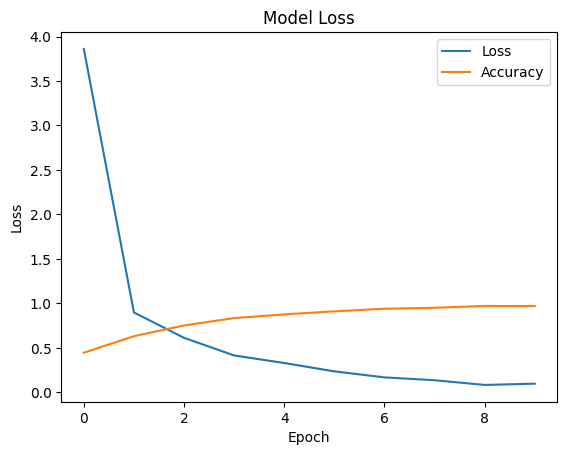

In [ ]:
# Plot training & validation loss values
plt.plot(compare2_3.history['loss'])
plt.plot(compare2_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [ ]:
model2_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare2_4 = model2_4.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 48s 1s/step - loss: 1.2326 - accuracy: 0.4467
Epoch 2/10
38/38 [==============================] - 50s 1s/step - loss: 0.9455 - accuracy: 0.6267
Epoch 3/10
38/38 [==============================] - 46s 1s/step - loss: 0.7649 - accuracy: 0.7208
Epoch 4/10
38/38 [==============================] - 47s 1s/step - loss: 0.6268 - accuracy: 0.7558
Epoch 5/10
38/38 [==============================] - 48s 1s/step - loss: 0.5554 - accuracy: 0.7942
Epoch 6/10
38/38 [==============================] - 46s 1s/step - loss: 0.4580 - accuracy: 0.8275
Epoch 7/10
38/38 [==============================] - 50s 1s/step - loss: 0.3498 - accuracy: 0.8767
Epoch 8/10
38/38 [==============================] - 46s 1s/step - loss: 0.3171 - accuracy: 0.8858
Epoch 9/10
38/38 [==============================] - 48s 1s/step - loss: 0.2989 - accuracy: 0.8925
Epoch 10/10
38/38 [==============================] - 48s 1s/step - loss: 0.3113 - accuracy: 0.8867


In [ ]:
model2_4.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 293ms/step - loss: 0.0685 - accuracy: 0.9900


[0.06853824853897095, 0.9900000095367432]

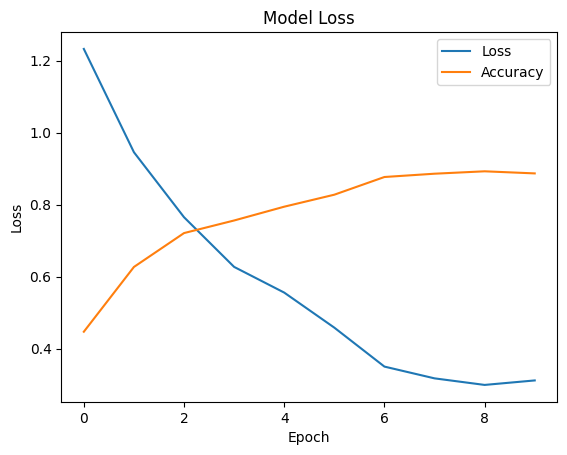

In [ ]:
# Plot training & validation loss values
plt.plot(compare2_4.history['loss'])
plt.plot(compare2_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()